# Exploración inicial de los datos

A continuación se presenta la exploración inicial del conjunto de datos acerca del data set **Base_Agrocila.cvs** correspondiente a evaluaciones agropecuarias en el departamento de Boyacá

In [25]:
#importaciones de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# importacion de los datos a df_agro
path_procces = '../Datos/Procesados/Base_Agricola.csv'
df_agro = pd.read_csv(path_procces,sep=';')
df_agro.head()

,codDaneDpto,Dpto,codDaneMunicipio,Municipio,desagregacionCultivo,Cultivo,cicloDelCultivo,grupoCultivo,Subgrupo,Anio,Periodo,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa,nombreCientificoCultivo,codCultivo,estadoFisicoCultivo
0,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2019,A,170.0,170.0,2550.0,15.0,Arracacia xanthorrhiza,1080200,En fresco
1,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2020,A,150.0,150.0,3750.0,25.0,Arracacia xanthorrhiza,1080200,En fresco
2,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2021,A,180.0,180.0,4500.0,25.0,Arracacia xanthorrhiza,1080200,En fresco
3,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2022,A,160.0,180.0,4500.0,25.0,Arracacia xanthorrhiza,1080200,En fresco
4,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2023,A,50.0,150.0,3750.0,25.0,Arracacia xanthorrhiza,1080200,En fresco


## Descripción general del dataSet

In [27]:
#Tamaño de la muestra
print(f'El tamaño del data set es : {df_agro.shape} registros')
# Descripción de las variales
print('\n','tipos de variables por columna \n',df_agro.info())

El tamaño del data set es : (12265, 18) registros
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12265 entries, 0 to 12264
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   codDaneDpto              12265 non-null  int64  
 1   Dpto                     12265 non-null  object 
 2   codDaneMunicipio         12265 non-null  int64  
 3   Municipio                12265 non-null  object 
 4   desagregacionCultivo     12265 non-null  object 
 5   Cultivo                  12265 non-null  object 
 6   cicloDelCultivo          12265 non-null  object 
 7   grupoCultivo             12265 non-null  object 
 8   Subgrupo                 12265 non-null  object 
 9   Anio                     12265 non-null  int64  
 10  Periodo                  12265 non-null  object 
 11  areaSembradaHa           12265 non-null  float64
 12  areaCosechadaHa          12265 non-null  float64
 13  produccionTon            1

In [28]:
df_agro.columns

Index(['codDaneDpto', 'Dpto', 'codDaneMunicipio', 'Municipio',
       'desagregacionCultivo', 'Cultivo', 'cicloDelCultivo', 'grupoCultivo',
       'Subgrupo', 'Anio', 'Periodo', 'areaSembradaHa', 'areaCosechadaHa',
       'produccionTon', 'rendimientoTonHa', 'nombreCientificoCultivo',
       'codCultivo', 'estadoFisicoCultivo'],
      dtype='object')

## **Distribuciones de Variables**
El data set cuenta con diversos tipos de datos, se hara una exploración inicial según el tipo de datos separando por un tipos Categorico y Númerico

### ***Datos Categoricos***

* codDaneDpto
* Dpto
* codDaneMunicipio
* Municipio
* desagregacionCultivo 
* Cultivo 
* cicloDelCultivo
* grupoCultivo
* Subgrupo
* nombreCientificoCultivo 
* estadoFisicoCultivo
* codCultivo
* Periodo


#### *CodDaneMunicipio*

In [29]:
df_MunB = df_agro[df_agro['Dpto'] == 'Boyacá']
df_MunB[['Municipio','codDaneMunicipio']].value_counts()

Municipio    codDaneMunicipio
Soatá        15753               173
Monguí       15466               172
La Uvita     15403               169
Duitama      15238               167
Santa María  15690               158
                                ... 
Mongua       15464                47
Floresta     15276                46
Pesca        15542                43
Iza          15362                32
Sáchica      15638                20
Length: 123, dtype: int64

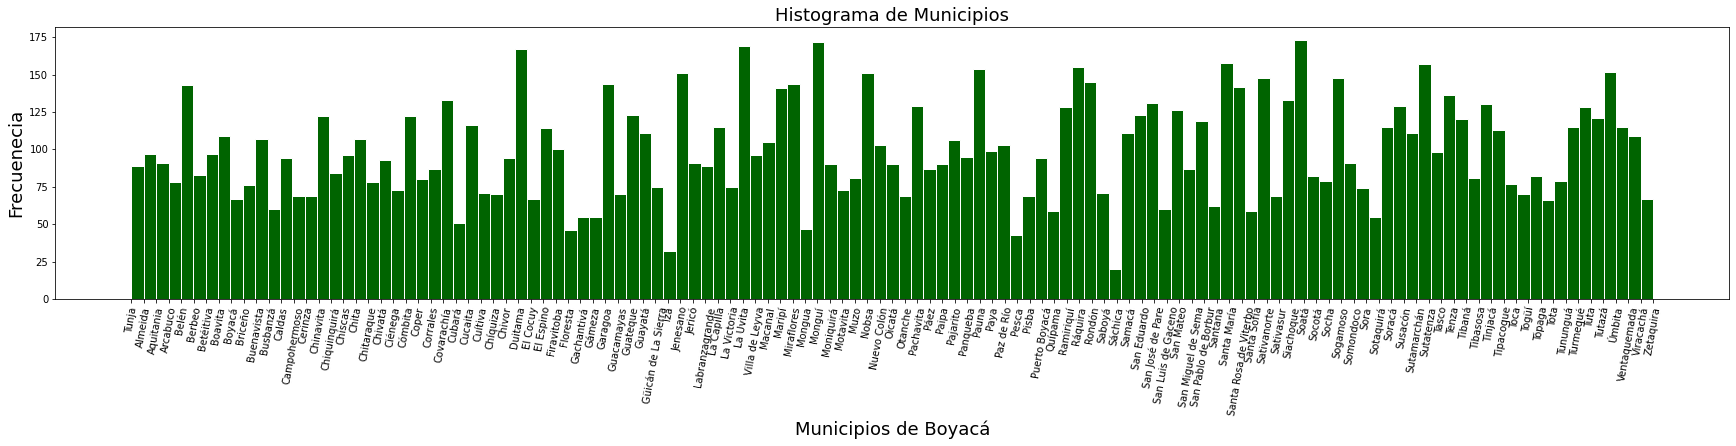

In [30]:
plt.figure(figsize=(30,5))
plt.hist(x = df_MunB['Municipio'], bins=123,edgecolor = 'white',color='darkgreen')
plt.tick_params(axis='x',rotation=80)
plt.xlabel('Municipios de Boyacá',fontsize = 18)
plt.ylabel('Frecuenecia',fontsize = 18)
plt.title('Histograma de Municipios',fontsize = 18)
plt.show()

Dado que las gráficas de frecuencia representadas anteriormente muestran que este campo corresponde al mismo registro, donde una columna representa el nombre y la otra el código asociado a dicho nombre, es pertinente evitar la redundancia en los datos. Para mantener la calidad, eficiencia y claridad de los datos, se recomienda quedarnos únicamente con el campo ‘Municipio’, ya que este es más descriptivo para nuestro dataset

#### *desagregacionCultivo y  CodCultivo*

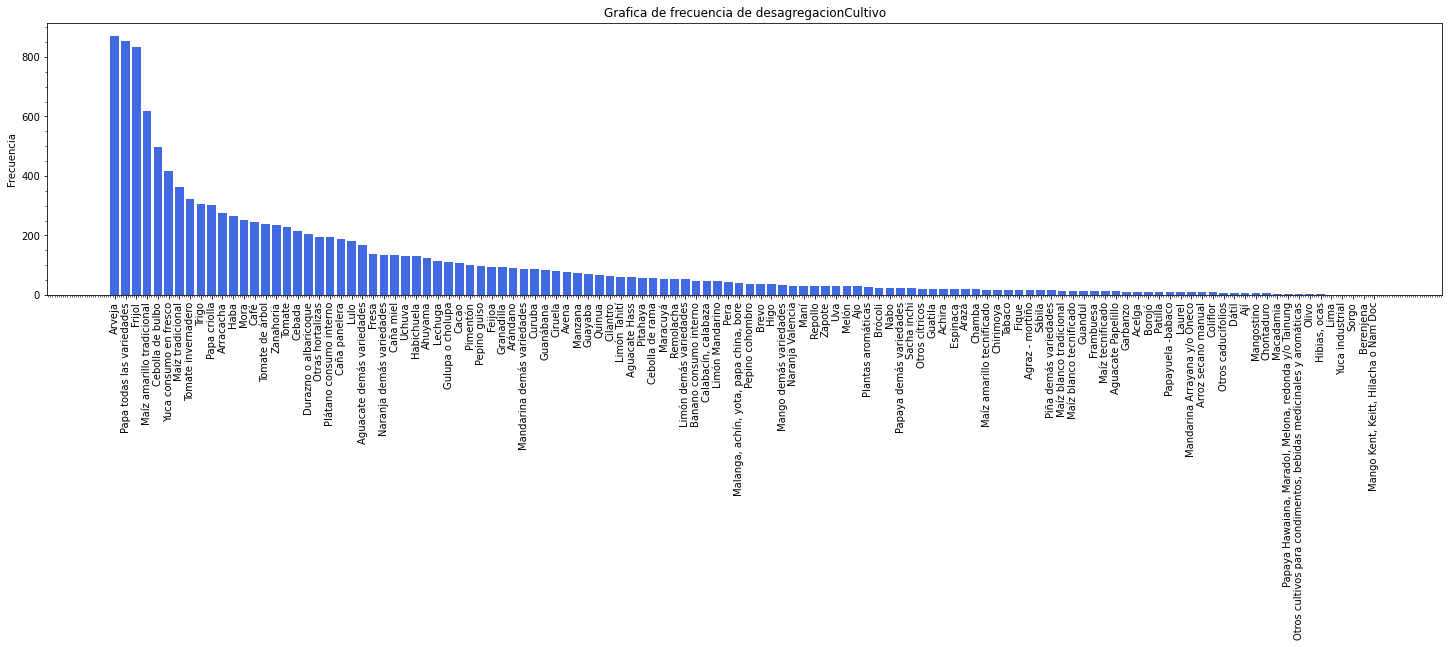

In [31]:
#grafica de desagregacionCultivo 
countsIndices = df_agro['desagregacionCultivo'].value_counts()
indices = countsIndices.index

plt.figure(figsize=(25,5))
plt.bar(indices,
        countsIndices,
        color = 'royalblue')
plt.title('Grafica de frecuencia de desagregacionCultivo')
plt.ylabel('Frecuencia')
plt.minorticks_on()
plt.grid
plt.tick_params(axis='x',rotation=90)
plt.show()

In [32]:
df_agro['desagregacionCultivo'].value_counts()

Arveja                                  871
Papa todas las variedades               853
Frijol                                  834
Maíz amarillo tradicional               617
Cebolla de bulbo                        497
                                       ... 
Lima                                      1
Yuca industrial                           1
Sorgo                                     1
Berenjena                                 1
Mango Kent, Keitt, Hilacha o Nam Doc      1
Name: desagregacionCultivo, Length: 118, dtype: int64

In [33]:
df_agro['codCultivo'].value_counts()

1060100    871
1080701    853
1060200    834
1010402    617
1051100    497
          ... 
2043500      1
1081002      1
1010700      1
1050800      1
2044201      1
Name: codCultivo, Length: 118, dtype: int64

Dada que las columnas 'desagregacionCultivo' y 'codCultivo'corresponden al nombre y la otra el código asociado a dicho nombre, es pertinente evitar la redundancia en los datos. Para mantener la calidad, eficiencia y claridad de los datos, se recomienda quedarnos únicamente con el campo 'desagregacionCultivo', ya que este es más descriptivo para nuestro dataset

#### *Cultivo*

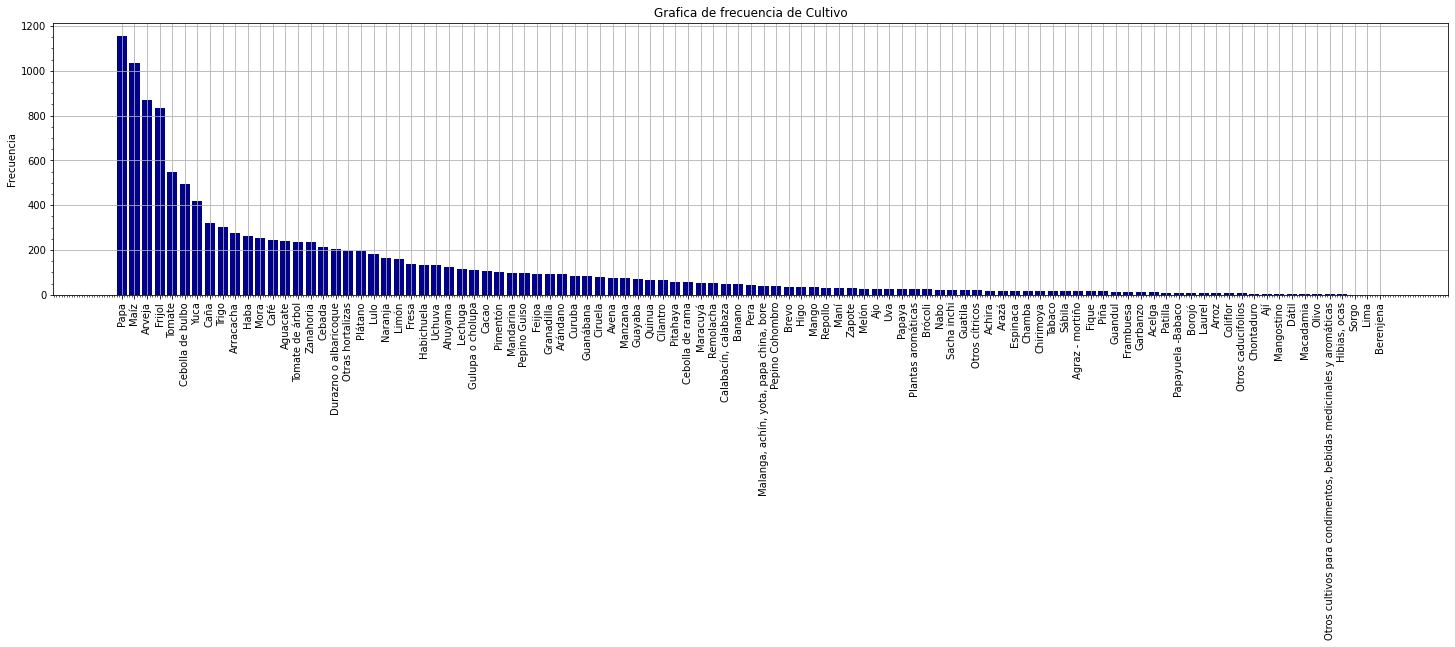

In [34]:
#grafica de Cultivo 
countsIndicesCul = df_agro['Cultivo'].value_counts()
indicesCul = countsIndicesCul.index

plt.figure(figsize=(25,5))
plt.bar(indicesCul,
        countsIndicesCul,
        color = 'darkblue')
plt.title('Grafica de frecuencia de Cultivo')
plt.ylabel('Frecuencia')
plt.grid()
plt.minorticks_on()
plt.tick_params(axis='x',rotation=90)
plt.show()

#### *CicloCultivo*

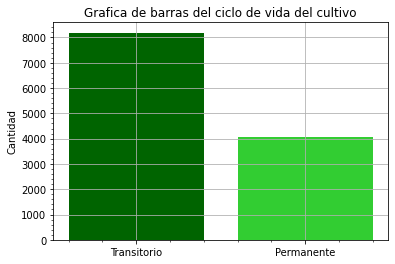

In [35]:
countCiclo = df_agro['cicloDelCultivo'].value_counts()
indicesCiclo=  countCiclo.index

# plt.figure(figsize=(5,5))
plt.bar(indicesCiclo,
        countCiclo,
        color = ['darkgreen','limegreen'])
plt.title('Grafica de barras del ciclo de vida del cultivo')
plt.ylabel('Cantidad')
plt.grid()
plt.minorticks_on()
# plt.tick_params(axis='x',rotation=90)
plt.show()

#### GrupoCultivo

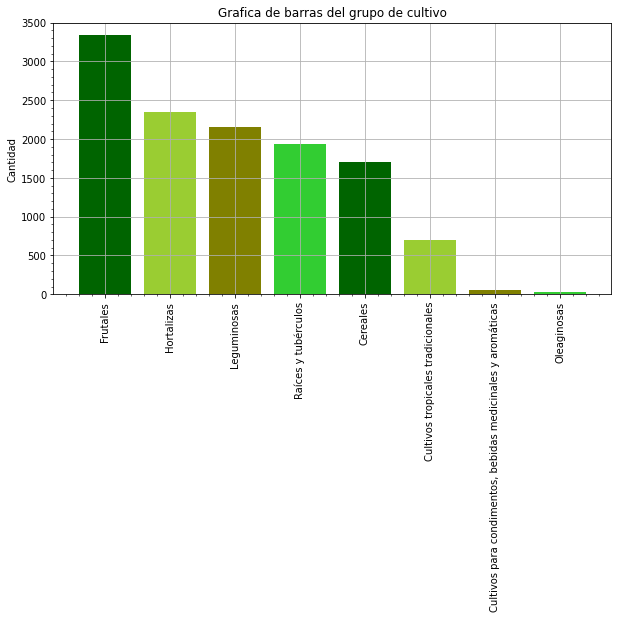

In [36]:
countGrupo = df_agro['grupoCultivo'].value_counts()
indicesGrupo=  countGrupo.index

plt.figure(figsize=(10,5))
plt.bar(indicesGrupo,
        countGrupo,
        color = ['darkgreen','yellowgreen','olive','limegreen'])
plt.title('Grafica de barras del grupo de cultivo')
plt.ylabel('Cantidad')
plt.grid()
plt.minorticks_on()
plt.tick_params(axis='x',rotation=90)
plt.show()

#### SubGrupo

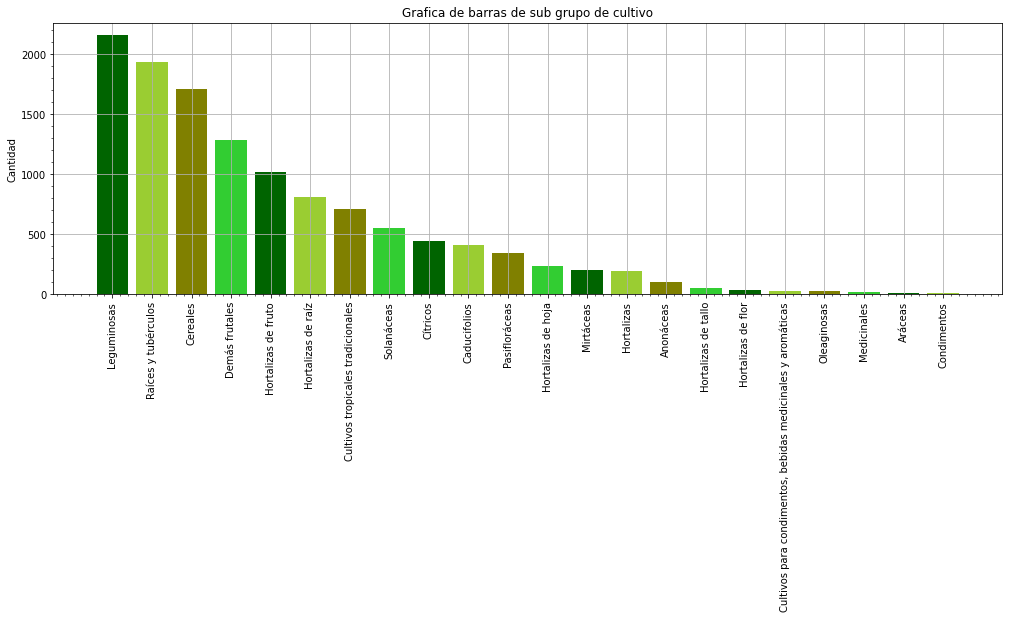

In [37]:
countGrupo = df_agro['Subgrupo'].value_counts()
indicesGrupo=  countGrupo.index

plt.figure(figsize=(17,5))
plt.bar(indicesGrupo,
        countGrupo,
        color = ['darkgreen','yellowgreen','olive','limegreen'])
plt.title('Grafica de barras de sub grupo de cultivo')
plt.ylabel('Cantidad')
plt.grid()
plt.minorticks_on()
plt.tick_params(axis='x',rotation=90)
plt.show()

####  *nombreCientificoCultivo*

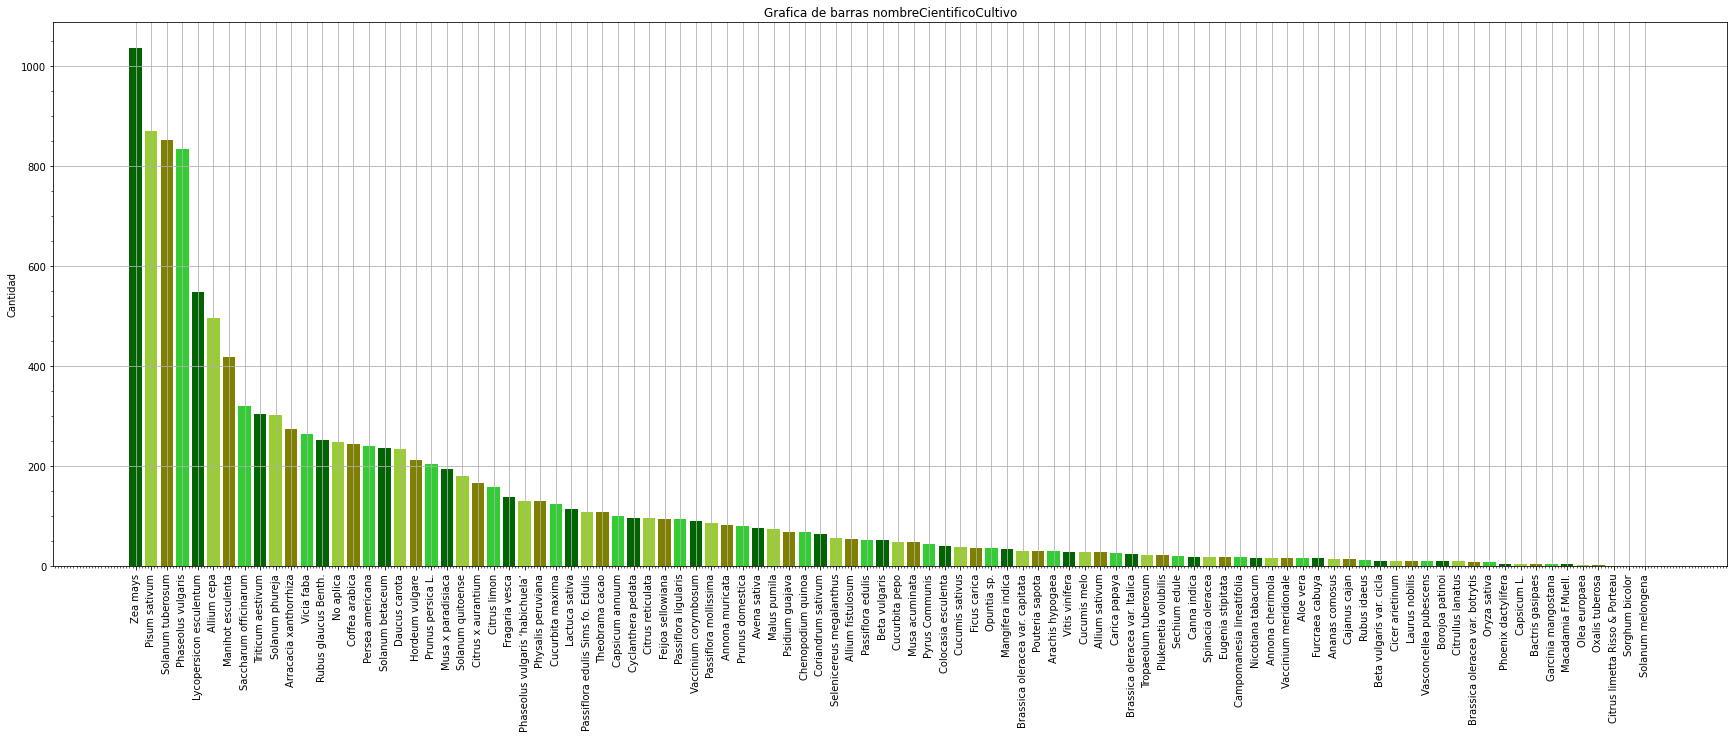

In [38]:
countNombreCultivo = df_agro['nombreCientificoCultivo'].value_counts()
indicesNombreCultivo=  countNombreCultivo.index

plt.figure(figsize=(30,10))
plt.bar(indicesNombreCultivo,
        countNombreCultivo,
        color = ['darkgreen','yellowgreen','olive','limegreen'])
plt.title('Grafica de barras nombreCientificoCultivo')
plt.ylabel('Cantidad')
plt.grid()
plt.minorticks_on()
plt.tick_params(axis='x',rotation=90)
plt.show()

#### *estadoFisicoCultivo*

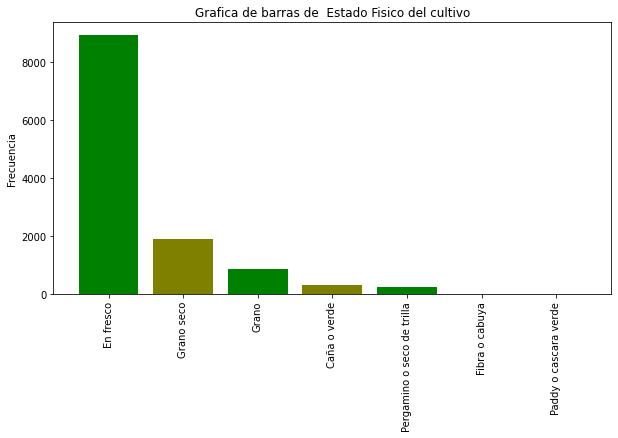

In [39]:
countEstado = df_agro['estadoFisicoCultivo'].value_counts()
indecesEstado = countEstado.index
plt.figure(figsize=(10,5))
plt.bar(indecesEstado,countEstado,color = ['green','olive'])
plt.title('Grafica de barras de  Estado Fisico del cultivo')
plt.ylabel('Frecuencia')
plt.tick_params(axis='x',rotation= 90)
plt.show()

In [40]:
countEstado

En fresco                     8912
Grano seco                    1893
Grano                          871
Caña o verde                   321
Pergamino o seco de trilla     244
Fibra o cabuya                  16
Paddy o cascara verde            8
Name: estadoFisicoCultivo, dtype: int64

#### *Periodo*

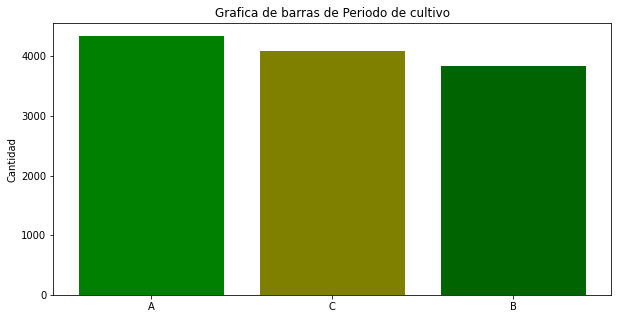

In [41]:
countPeriodo = df_agro['Periodo'].value_counts()
indecesPeriodo = countPeriodo.index
plt.figure(figsize=(10,5))
plt.bar(indecesPeriodo,countPeriodo,color = ['green','olive','darkgreen'])
plt.title('Grafica de barras de Periodo de cultivo')
plt.ylabel('Cantidad')
plt.show()